La bibliothèque quantique

Nous verrons pourquoi, avec son diffuseur quantique et l'aide d'Aïka, bob trouve toujours le bon grimoire

Import

In [1]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

Création de grimoire

In [2]:
def create_circ(grimoire):
    # Création du circuit
    circ = QuantumCircuit(2)
    circ.h(0)
    circ.h(1)
    circ.barrier()

    if grimoire == 1:
        circ.x(0)
        circ.x(1)
        circ.cz(0, 1)
        circ.x(0)
        circ.x(1)
        circ.barrier()
    elif grimoire == 2:
        circ.x(1)
        circ.cz(0, 1)
        circ.x(1)
        circ.barrier()
    elif grimoire == 3:
        circ.x(0)
        circ.cz(0, 1)
        circ.x(0)
        circ.barrier()
    elif grimoire == 4:
        circ.cz(0, 1)
        circ.barrier()
    else:
        raise ValueError("Value must be between 1 and 4")
    
    # Stream
    circ.h(0)
    circ.h(1)
    circ.z(0)
    circ.z(1)
    circ.cz(0,1)
    circ.h(0)
    circ.h(1)
    circ.barrier()
    
    return circ

In [3]:
def simulate_circ(circ):
    states = {'00': 0, '01': 0, '10': 0, '11': 0}
    circ.measure_all()
    
    simulator: AerSimulator = Aer.get_backend('aer_simulator')
    circ = transpile(circ, simulator)
    result = simulator.run(circ).result()
    counts = result.get_counts(circ)

    states.update(counts)
    
    return states

Grimoire 1

/Users/jimmy/ESGI/Deep/venv/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


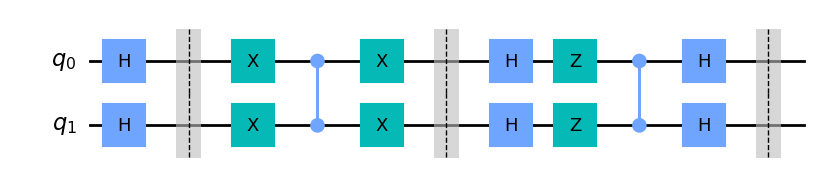

In [4]:
circ = create_circ(1)
circ.draw("mpl")

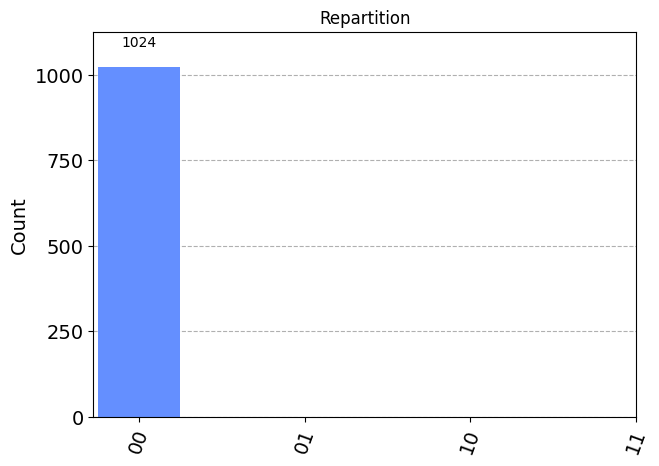

In [5]:
counts = simulate_circ(circ)
plot_histogram(counts, title="Repartition")

Grimoire 2

/Users/jimmy/ESGI/Deep/venv/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


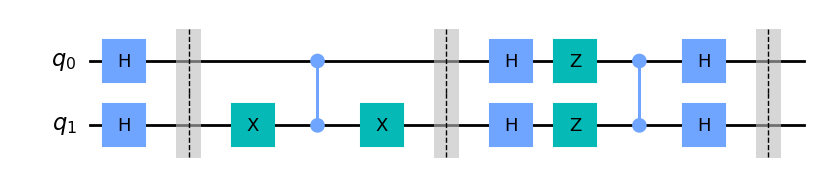

In [6]:
circ = create_circ(2)
circ.draw("mpl")

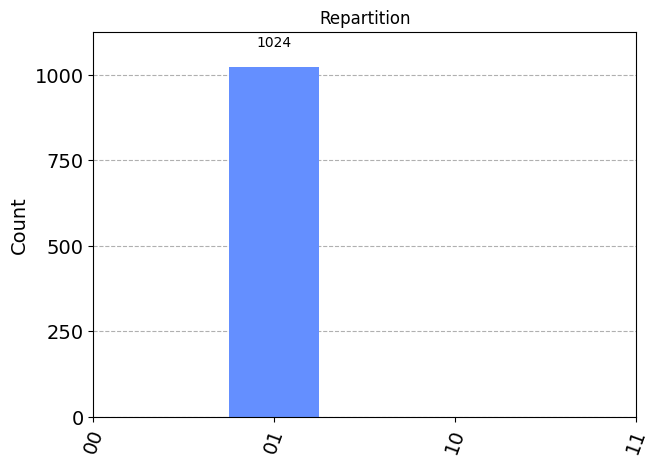

In [7]:
counts = simulate_circ(circ)
plot_histogram(counts, title="Repartition")

Grimoire 3

/Users/jimmy/ESGI/Deep/venv/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


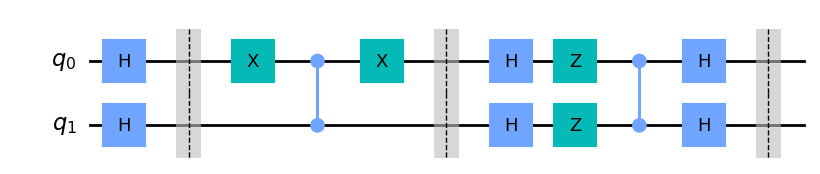

In [8]:
circ = create_circ(3)
circ.draw("mpl")

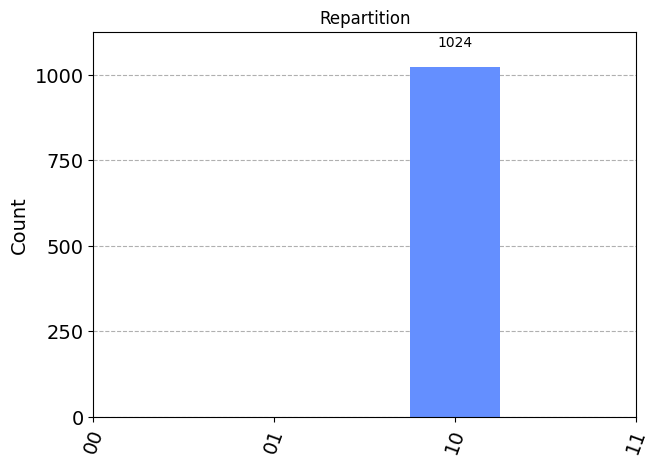

In [9]:
counts = simulate_circ(circ)
plot_histogram(counts, title="Repartition")

Grimoire 4

/Users/jimmy/ESGI/Deep/venv/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


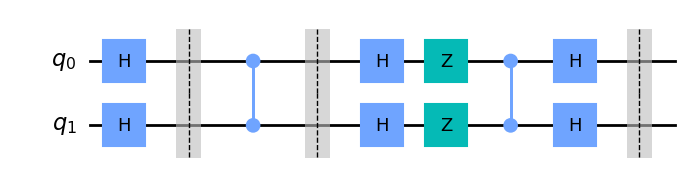

In [10]:
circ = create_circ(4)
circ.draw("mpl")

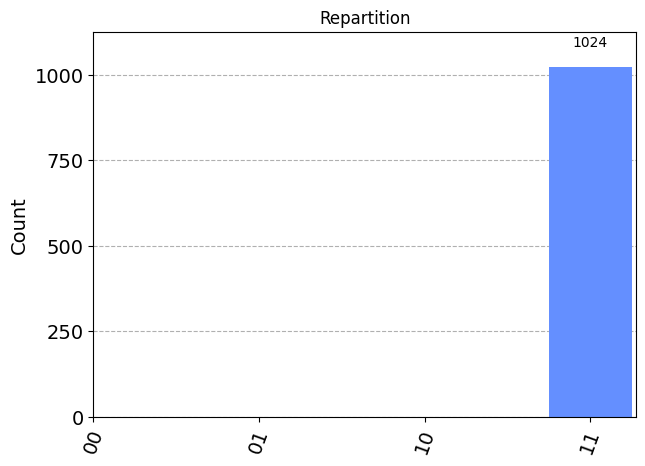

In [11]:
counts = simulate_circ(circ)
plot_histogram(counts, title="Repartition")